In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [22]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime, timedelta

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

C:\Users\dell\AppData\Local\Temp\ipykernel_7280\4196587217.py:4: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

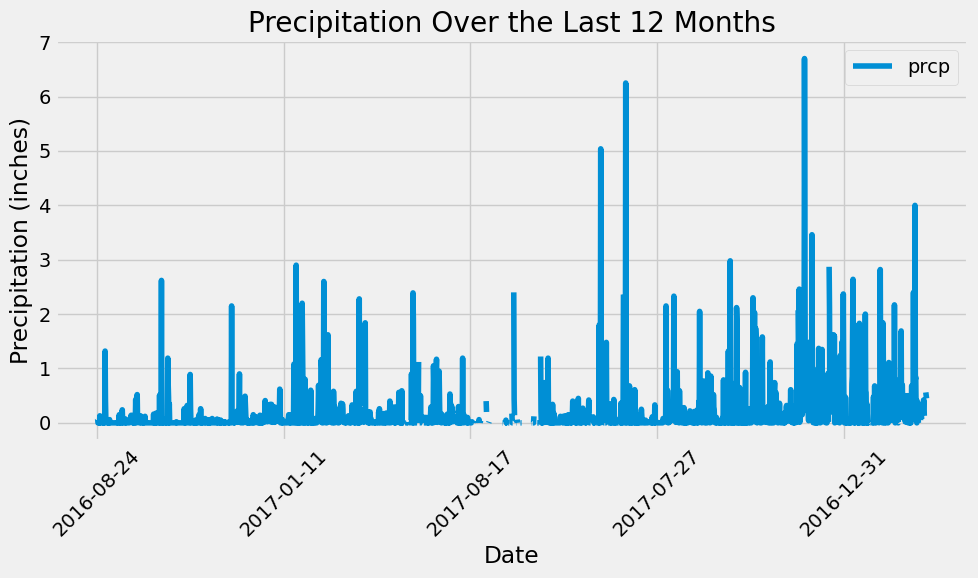

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
cutoff_date = '2016-08-23'
# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores
prcp = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > cutoff_date).all()
prcp

# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_df = pd.DataFrame(prcp)
prcp_df

# Sort the dataframe by date
prcp_df.sort_values(by='date')
prcp_df

# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot(x='date', y='prcp', figsize=(10,6))
plt.title('Precipitation Over the Last 12 Months')
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [14]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_stats = prcp_df['prcp'].describe()
print(summary_stats)


count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64


# Exploratory Station Analysis

In [15]:
# Design a query to calculate the total number of stations in the dataset
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(func.count(Station.station)).scalar()
print("Total number of stations:", total_stations)


Total number of stations: 9


In [16]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order
station_counts = session.query(Measurement.station, func.count(Measurement.station))\
                        .group_by(Measurement.station)\
                        .order_by(func.count(Measurement.station).desc())\
                        .all()

for station, count in station_counts:
    print(f"Station: {station}, Count: {count}")

Station: USC00519281, Count: 2772
Station: USC00519397, Count: 2724
Station: USC00513117, Count: 2709
Station: USC00519523, Count: 2669
Station: USC00516128, Count: 2612
Station: USC00514830, Count: 2202
Station: USC00511918, Count: 1979
Station: USC00517948, Count: 1372
Station: USC00518838, Count: 511


In [19]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# Get the most active station ID from the previous query
most_active_station = station_counts[0][0]

# Query to calculate the lowest, highest, and average temperature for the most active station
temp_stats = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs))\
                    .filter(Measurement.station == most_active_station)\
                    .all()

# Extract the results
lowest_temp, highest_temp, avg_temp = temp_stats[0]

print(f"Lowest Temperature at Station {most_active_station}: {lowest_temp} °F")
print(f"Highest Temperature at Station {most_active_station}: {highest_temp} °F")
print(f"Average Temperature at Station {most_active_station}: {avg_temp:.2f} °F")
print("Most Active Station:", most_active_station)

Lowest Temperature at Station USC00519281: 54.0 °F
Highest Temperature at Station USC00519281: 85.0 °F
Average Temperature at Station USC00519281: 71.66 °F
Most Active Station: USC00519281


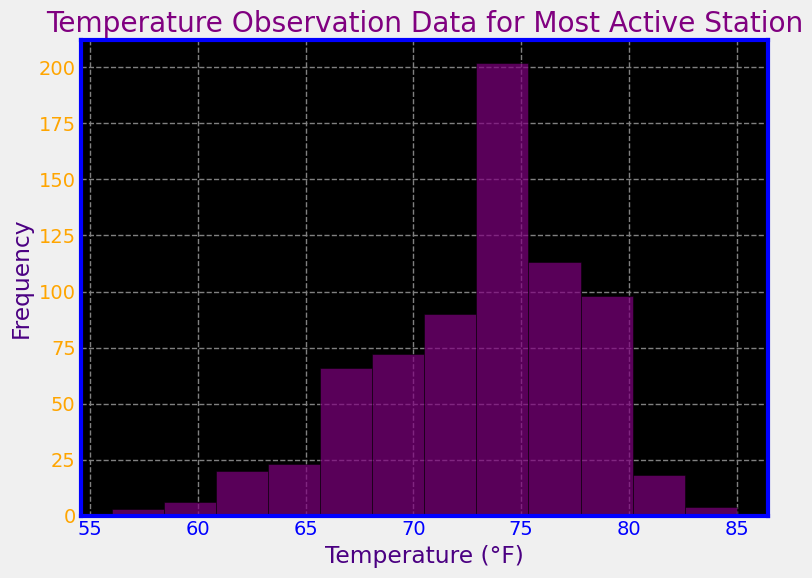

In [34]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# Query the last 12 months of temperature observation data for the most active station
# Define the date one year prior to the cutoff date
cutoff_date_dt = datetime.strptime(cutoff_date, '%Y-%m-%d')
one_year_ago = cutoff_date_dt - timedelta(days=365)


# Query the last 12 months of temperature observation data for the most active station
temp_observation = session.query(Measurement.tobs)\
                         .filter(Measurement.station == most_active_station)\
                         .filter(Measurement.date >= one_year_ago)\
                         .all()

# Convert the result to a list of temperatures
temperatures = [temp[0] for temp in temp_observation]

# Plotting the histogram
# Plotting the histogram with customized colors
with plt.style.context({'axes.facecolor': 'black', 'axes.edgecolor':'blue', 'axes.labelcolor':'indigo', 
                        'xtick.color':'blue', 'ytick.color':'orange', 'text.color':'purple', 
                        'grid.color':'gray', 'grid.linestyle':'--'}):
    plt.figure(figsize=(8, 6))
    plt.hist(temperatures, bins=12, color='purple', edgecolor='black', alpha=0.7)
    plt.title('Temperature Observation Data for Most Active Station')
    plt.xlabel('Temperature (°F)')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.show()




# Close Session

In [25]:
# Close Session
session.close()